In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.size"] =16
plt.rcParams["figure.figsize"] =(12, 8)
plt.rcParams["figure.facecolor"] = "#F2F2F2"

In [ ]:
data = pd.read_csv("world-happiness-dataset-2023.csv")

In [ ]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
#Checks for duplicates
data.duplicated().any()

False

In [ ]:
data_columns= ["Country name", "Regional indicator", "Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

In [ ]:
# Creating a copy of our columns of interest
data = data[data_columns].copy()


In [ ]:
#Renaming the columns for improved readability
happy_df = data.rename(columns=
    {"Country name":"country_name",
    "Regional indicator":"regional_indicator",
    "Ladder score":"happiness_score",
    "Logged GDP per capita":"logged_GDP_per_capita",
    "Social support":"social_support",
    "Healthy life expectancy":"health_life_expectancy",
    "Freedom to make life choices":"freedom_to_make_life_choices",
    "Generosity":"generosity",
    "Perceptions of corruption":"perception_of_corruption"
})

In [ ]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perception_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [ ]:
#Checks for missing values if any
happy_df.isnull().sum()

,0
country_name,0
regional_indicator,0
happiness_score,0
logged_GDP_per_capita,0
social_support,0
health_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perception_of_corruption,0


Univariate Analysis (top 10 happiest countries wrt happiness score)

In [ ]:
# Eaxaming the top 10 happiest countries with respect to happiness score
top_10_happiest_countries = happy_df.nlargest(10, 'happiness_score')
top_10_happiest_countries_filtered = top_10_happiest_countries.loc[:, ['country_name', 'regional_indicator', 'happiness_score']]
print(top_10_happiest_countries_filtered)

  country_name     regional_indicator  happiness_score
0      Finland         Western Europe            7.842
1      Denmark         Western Europe            7.620
2  Switzerland         Western Europe            7.571
3      Iceland         Western Europe            7.554
4  Netherlands         Western Europe            7.464
5       Norway         Western Europe            7.392
6       Sweden         Western Europe            7.363
7   Luxembourg         Western Europe            7.324
8  New Zealand  North America and ANZ            7.277
9      Austria         Western Europe            7.268


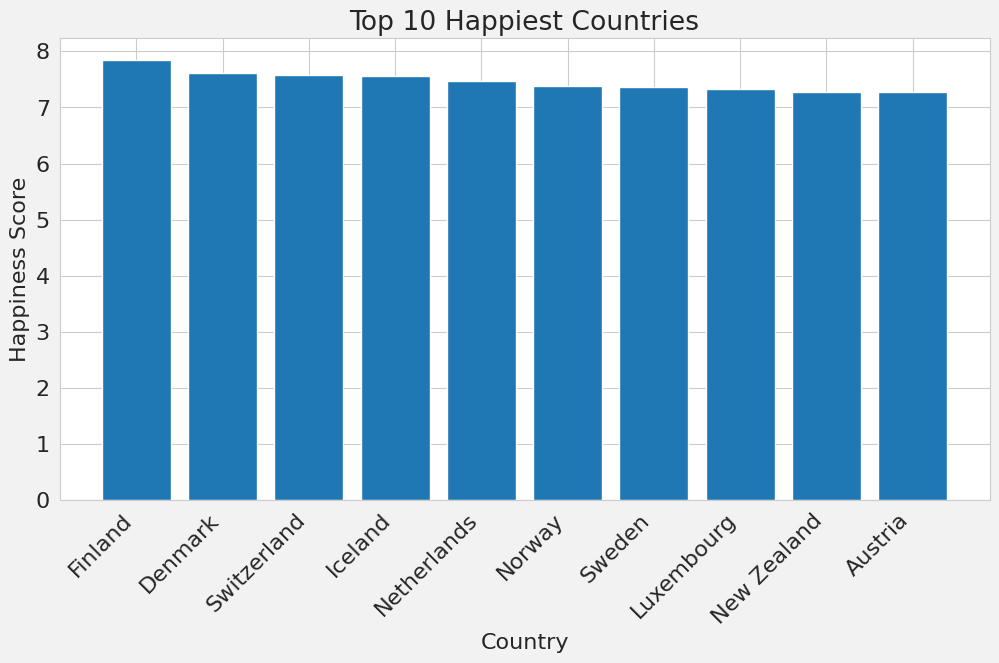

In [ ]:
#Visualisation of the top 10 happiest counrties

plt.figure(figsize=(12, 6))
plt.bar(top_10_happiest_countries['country_name'], top_10_happiest_countries['happiness_score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')

plt.xticks(rotation=45, ha='right')
plt.show()

Observation : Finland Happiest

Bivariate Analysis

Text(0, 0.5, 'GDP per Capita')

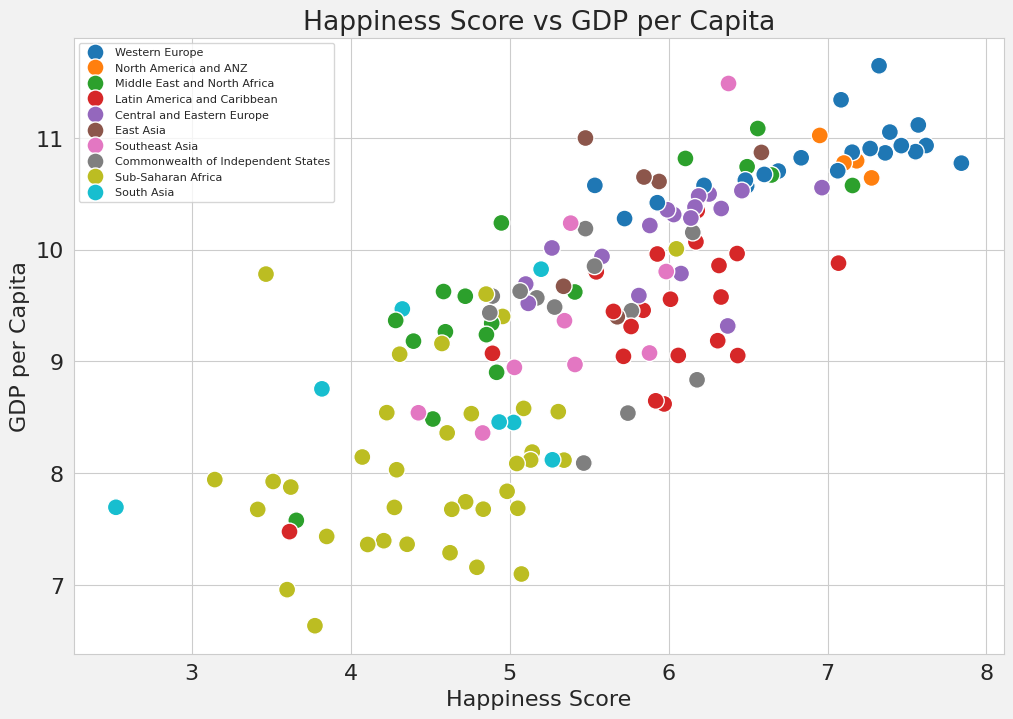

In [ ]:
#Scatter plot of happines_score vs GDP per Capita
sns.scatterplot(x=happy_df.happiness_score,
                y=happy_df.logged_GDP_per_capita,
                hue=happy_df.regional_indicator, s=150);

#The figure should be 12x7 inches
plt.rcParams["figure.figsize"] =(12, 7)

#Title of plot
plt.title("Happiness Score vs GDP per Capita")

#Legend should be positioned at the upper left with a font size of 8
plt.legend(loc="upper left", fontsize="8")

#X-axis
plt.xlabel("Happiness Score")
#Y-axis
plt.ylabel("GDP per Capita")

In [ ]:
#Calculating the mean of GDP per regions
gdp_region = happy_df.groupby("regional_indicator")["logged_GDP_per_capita"].mean()

#Printing the mean of GDP per regions
print(gdp_region)

regional_indicator
Central and Eastern Europe            10.109059
Commonwealth of Independent States     9.401833
East Asia                             10.367667
Latin America and Caribbean            9.370000
Middle East and North Africa           9.666118
North America and ANZ                 10.809500
South Asia                             8.682571
Southeast Asia                         9.421444
Sub-Saharan Africa                     8.075194
Western Europe                        10.822714
Name: logged_GDP_per_capita, dtype: float64


Text(0, 0.5, ' ')

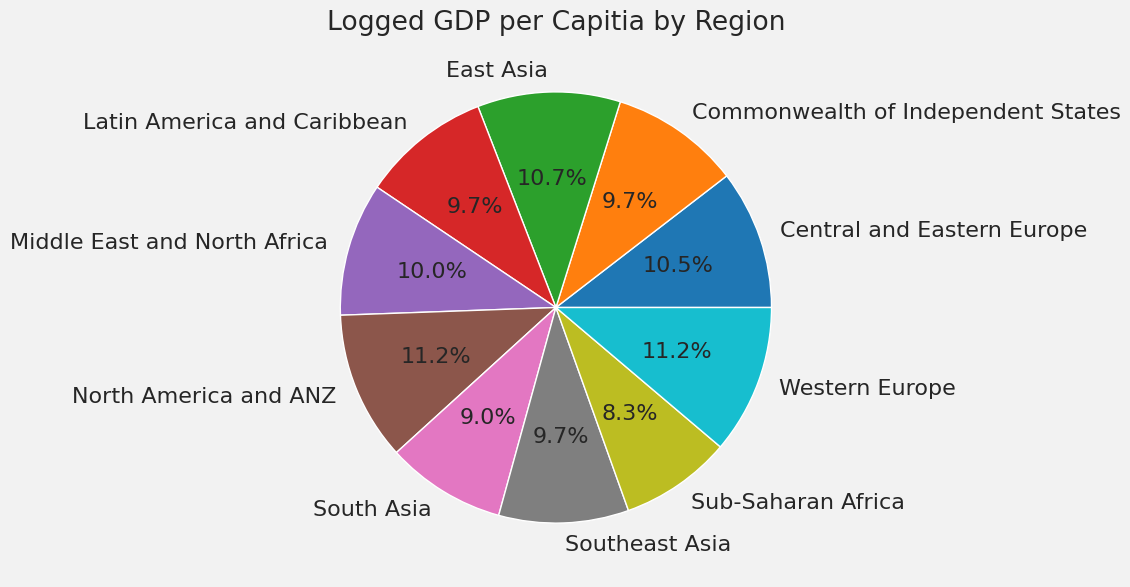

In [ ]:
#Plotting the sum of GDP's per region in a Pie Chart
gdp_region.plot.pie(autopct ="%1.1f%%")
plt.title("Logged GDP per Capitia by Region")
plt.ylabel(" ")

In [ ]:
#Total countries in each region

total_country=happy_df.groupby("regional_indicator")["country_name"].count()

#Printing count of Total countries in each region
print(total_country)

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64


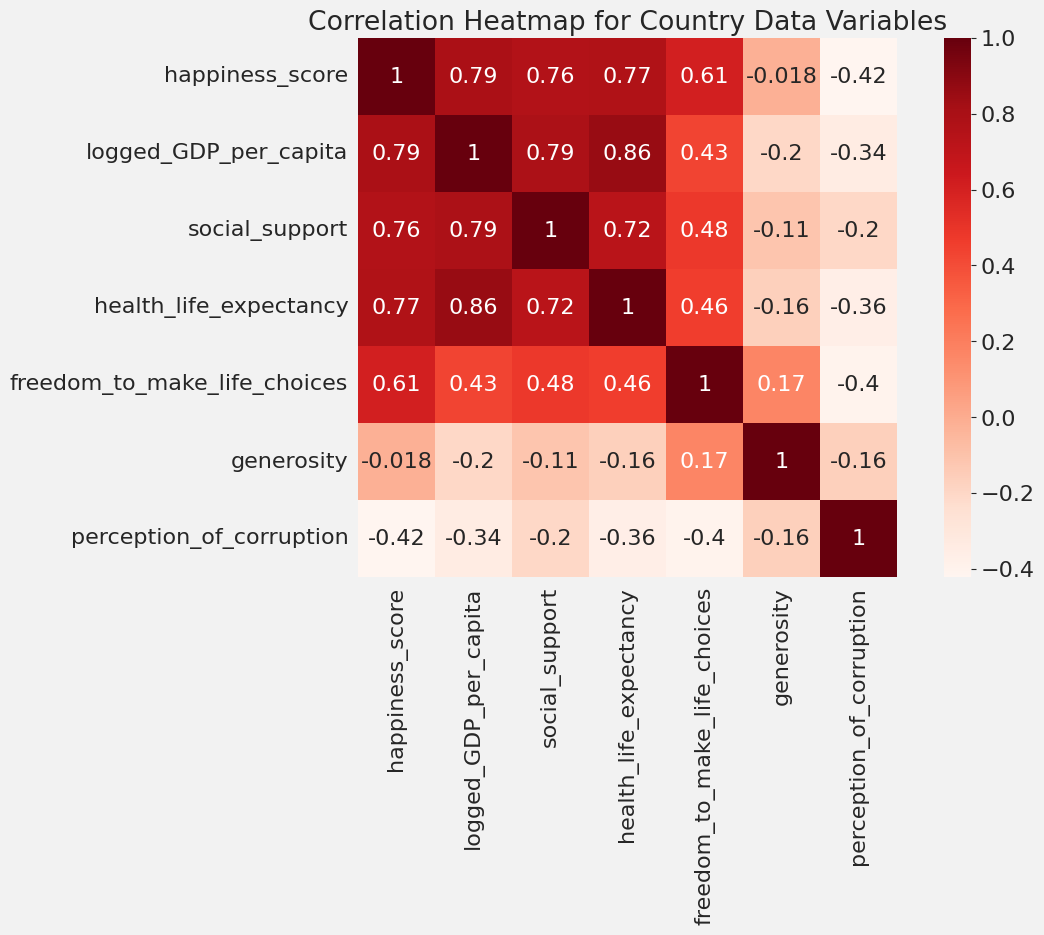

In [ ]:
#Creating variable core for our correlation calucation using pearson method.
#Pearson method was used because it measures the linear relationship between two variables
numerical_columns = happy_df.select_dtypes(include=np.number).columns
cor = happy_df[numerical_columns].corr(method="pearson")

#Heatmap to visualise correlation
sns.heatmap(cor, cmap="Reds", square=True, annot=True)
plt.title("Correlation Heatmap for Country Data Variables")

#To clear warnings. This was done because a warning notifcation displayed after plotting the heatmap
import warnings
warnings.filterwarnings("default")

Generosity and perception of corruption negative correlation whereas all others positive correlation

In [ ]:
# Eaxmning the perception of corruption across various regions

corruption= happy_df.groupby("regional_indicator")["perception_of_corruption"].mean()

#Printing Perception of Corruption acorss various regions
print(corruption)

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perception_of_corruption, dtype: float64


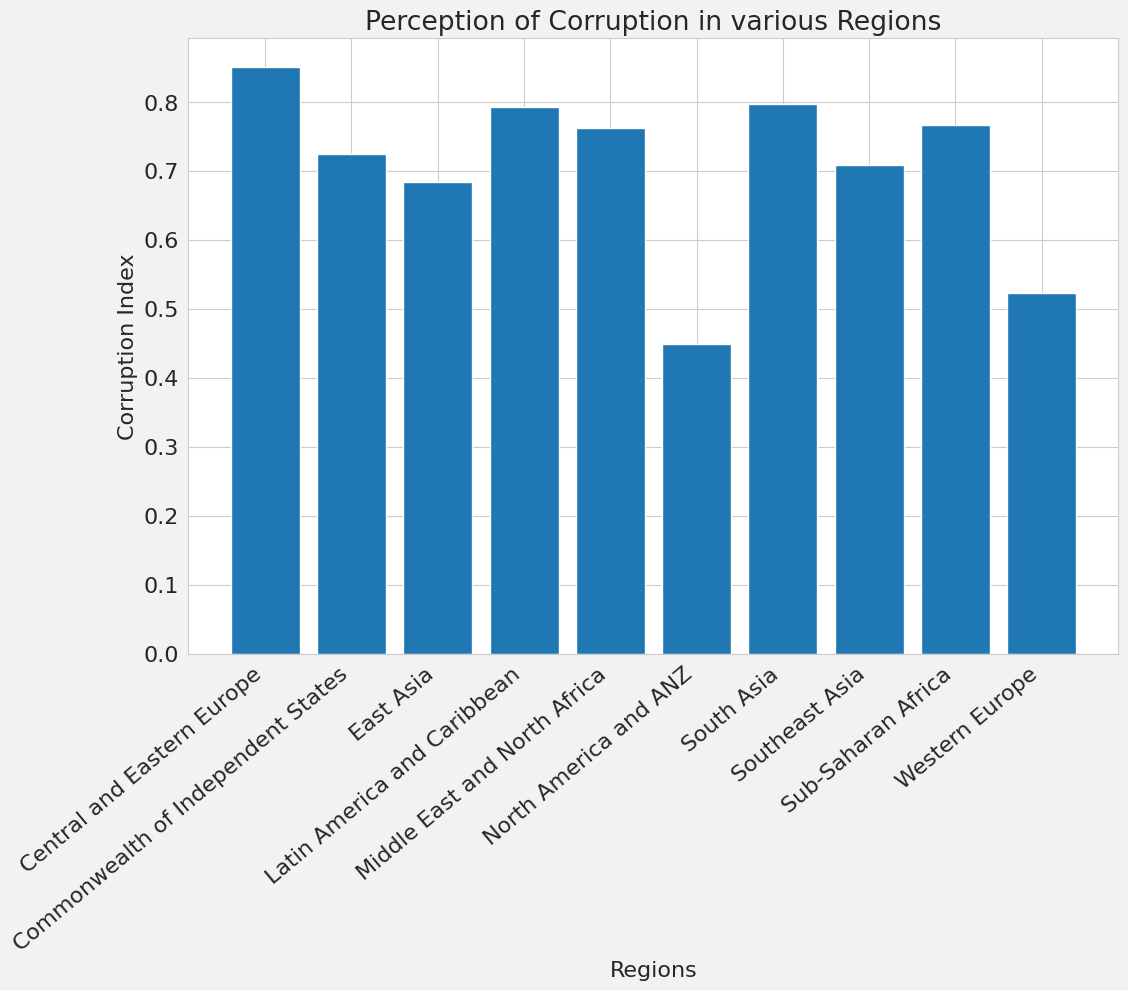

In [ ]:
#Visualising perception of corruption across regions.
# It is important to note that in the code for ploting the bar chart, that is "plt.bar(corruption.index, corruption)",
# corruption.index retrives the index information of corruption data frame which are the various regions.

plt.rcParams["figure.figsize"]= (12, 8)
plt.title("Perception of Corruption in various Regions")
plt.xlabel("Regions")
plt.ylabel("Corruption Index")
plt.xticks(rotation =40, ha="right")
plt.bar(corruption.index, corruption);

In [ ]:
# Top ten happiest countries
top_10=happy_df.head(10)
# Last ten happiest countries
bottom_10=happy_df.tail(10)

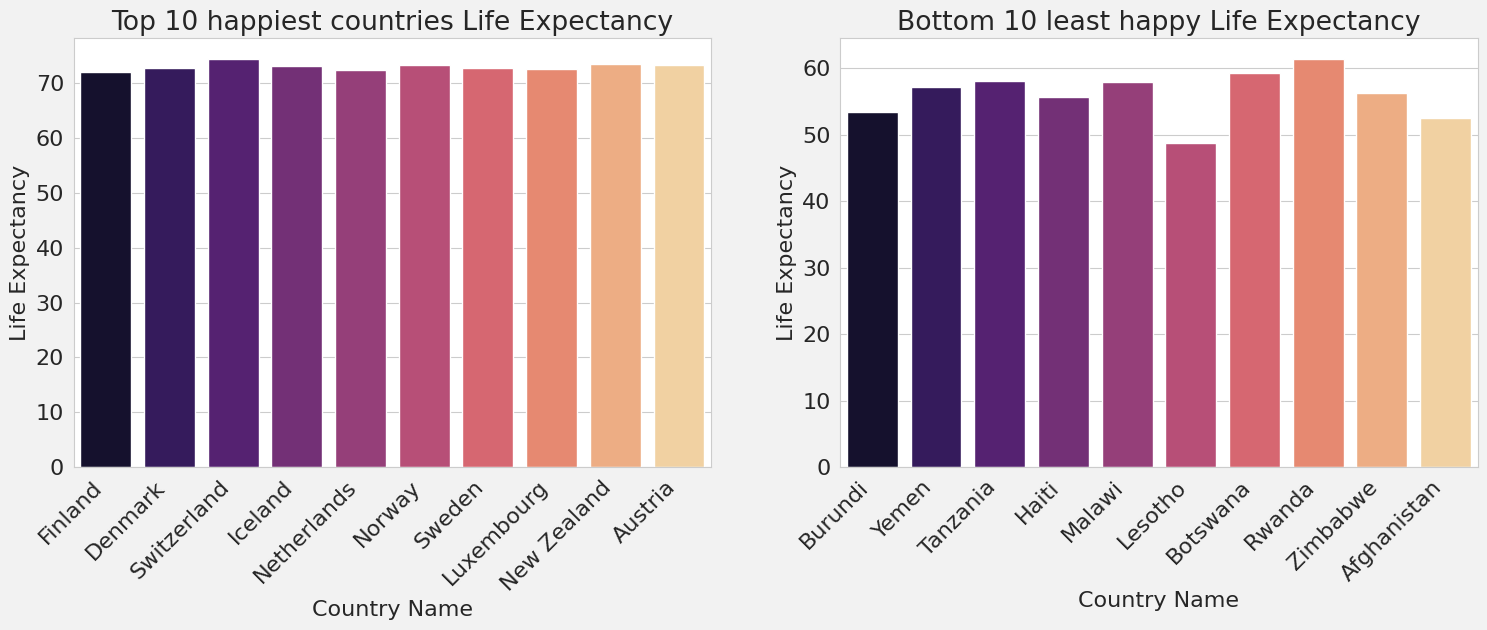

In [ ]:
# Creating the plots for the Life Expectancy of the top 10 and bottom 10 happiest countries
fig, axes = plt.subplots(1, 2, figsize=(16, 6))   #creates two subplots with figsize of 16x6 inches
plt.tight_layout(pad=3)        #adjusts the spaces between the two plots so as to avoid overlap

xlabels = top_10.country_name
axes[0].set_title("Top 10 happiest countries Life Expectancy")
sns.barplot(x=top_10.country_name, y=top_10.health_life_expectancy, ax=axes[0], hue = top_10.country_name, palette='magma', dodge = False, legend=False )
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectancy")
axes[0].set_xticks(range(len(xlabels)))
axes[0].set_xticklabels(xlabels, rotation=45, ha="right") # Sets the x-axis tick labels using the xlabels variable.
                                                          # The rotation=45 argument rotates the labels by 45 degrees,
                                                          # and ha="right" aligns them to the right


xlabels = bottom_10.country_name
axes[1].set_title("Bottom 10 least happy Life Expectancy")
sns.barplot(x=bottom_10.country_name, y=bottom_10.health_life_expectancy, ax=axes[1], hue = bottom_10.country_name, palette='magma', dodge = False, legend=False)
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectancy")
axes[1].set_xticks(range(len(xlabels)))
axes[1].set_xticklabels(xlabels, rotation=45, ha="right");  # Sets the x-axis tick labels using the xlabels variable.
                                                          # The rotation=45 argument rotates the labels by 45 degrees,
                                                          # and ha="right" aligns them to the right
import warnings
warnings.filterwarnings('ignore')

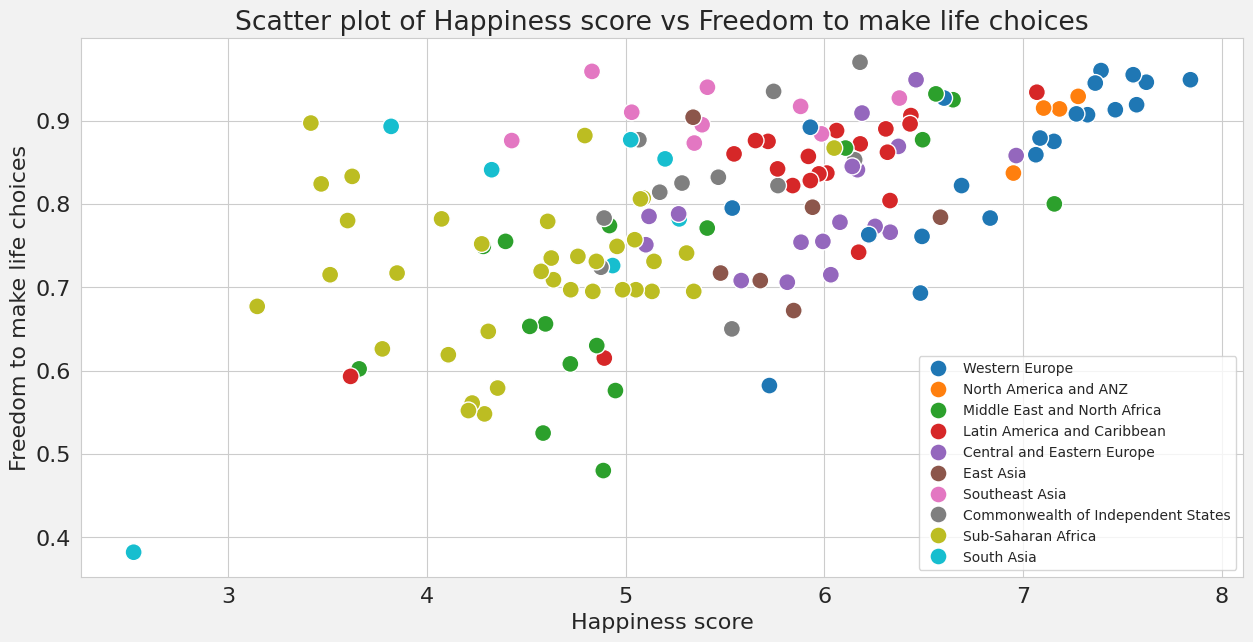

In [ ]:
#Examing happiness score in regards to freedom to make life choices via scatter plot
sns.scatterplot(x=happy_df.happiness_score,
                y=happy_df.freedom_to_make_life_choices,
                hue=happy_df.regional_indicator, s=150)

plt.rcParams["figure.figsize"]= (15, 7)
plt.title("Scatter plot of Happiness score vs Freedom to make life choices")
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("Happiness score")
plt.ylabel("Freedom to make life choices");

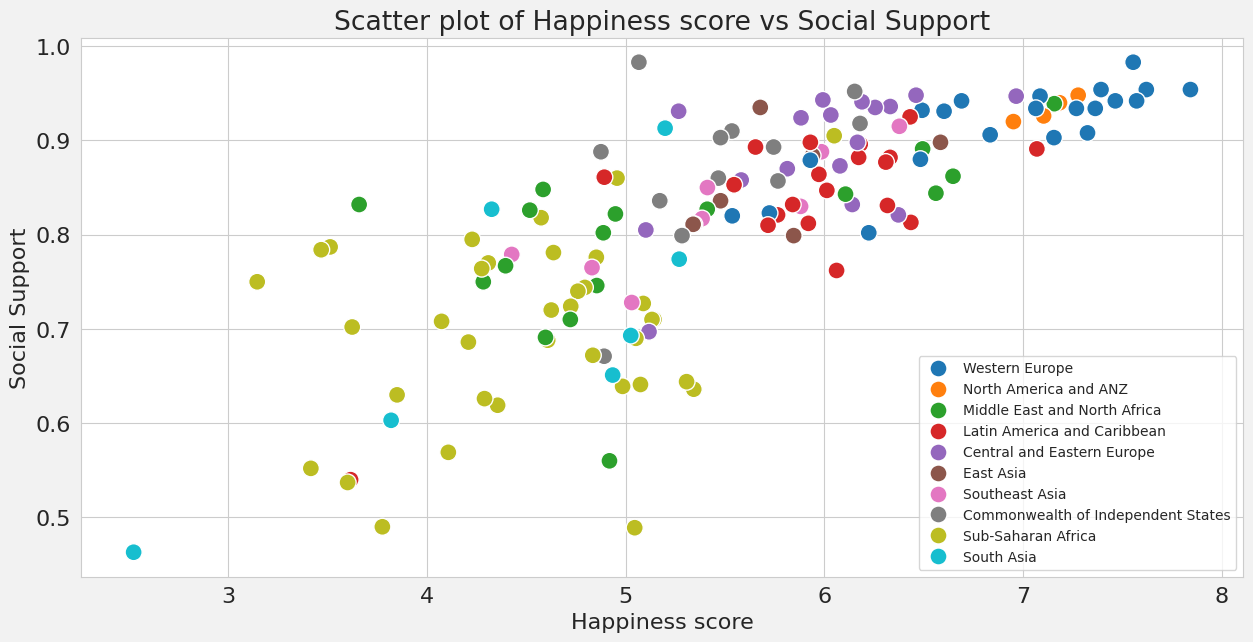

In [ ]:
#Examing happiness score in regards to social support via scatter plot
sns.scatterplot(x=happy_df.happiness_score,
                y=happy_df.social_support,
                hue=happy_df.regional_indicator, s=150)

plt.rcParams["figure.figsize"]= (15, 7)
plt.title("Scatter plot of Happiness score vs Social Support")
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("Happiness score")
plt.ylabel("Social Support");

Multivariate Analysis

Text(0, 0.5, 'GDP per Capita')

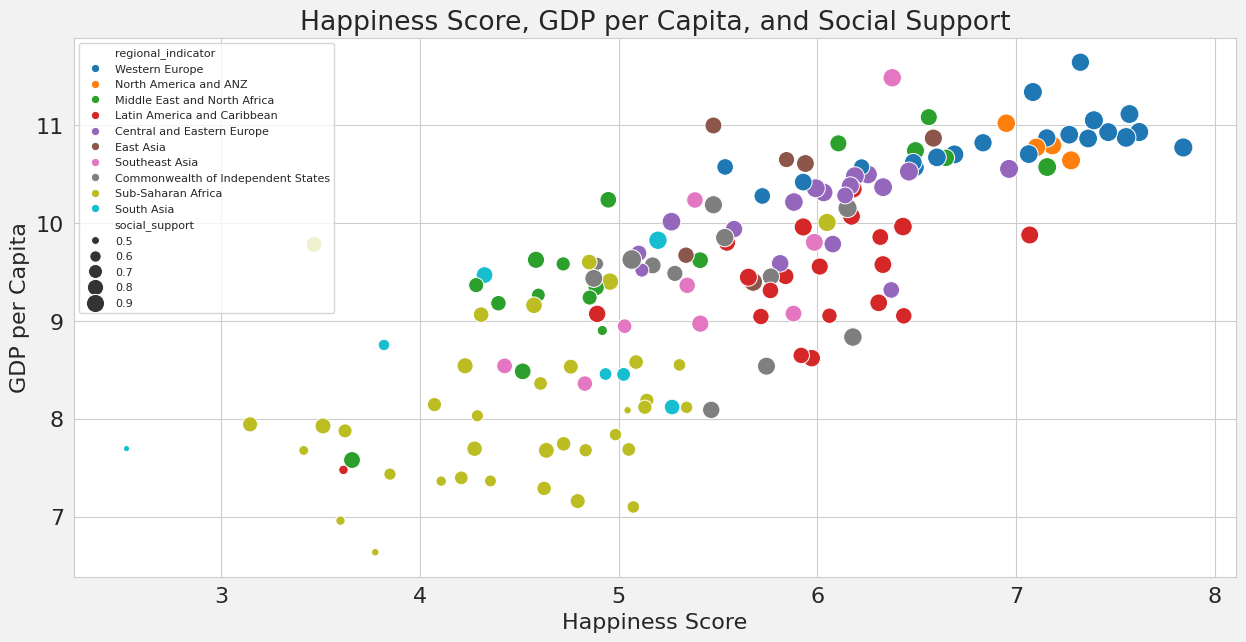

In [ ]:
# Eaxming the effect of Logged GDP per capita and Social support on Hapiness scores
sns.scatterplot(x=happy_df.happiness_score,
                y=happy_df.logged_GDP_per_capita,
                hue=happy_df.regional_indicator,
                size=happy_df["social_support"],
                sizes=(20, 200))


plt.rcParams["figure.figsize"] = (12, 7)
plt.title("Happiness Score, GDP per Capita, and Social Support")
plt.legend(loc="upper left", fontsize=8)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")